"And since 2004, when ten Eastern European countries joined the European Union, much of that growth has been concentrated in the east – while the number of transfers per year in Western Europe increased by 20% from 2004 to 2015, the number of transfers per year in Eastern Europe increased by a whopping 120%."

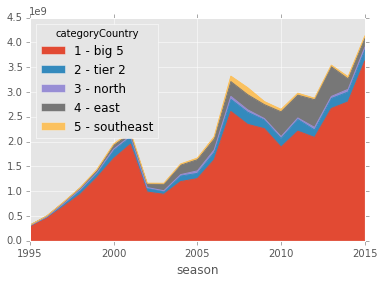

In [78]:
big5=['GB1','ES1','L1','IT1','FR1']
tier2=['PO1','NL1','SC1','BE1']
north=['DK1','SE1','NO1','A1','C1','LUX1','FI1','IR1','IS1','WAL','NIR','FARO']
east=['LI1','ISR1','PL1','UNG1','MAL1','KAS1','TS1','SLO1','SL1','FI1','AZ1','EST1','LET1','ARM1','LI1','WER1','UKR1','RU1','TR1']
southeast=['GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','ALB1','MNE1','MAL1','MOL1','MAZ1']

def category(league):
    if league in big5:
        return '1 - big 5'
    elif league in tier2:
        return '2 - tier 2'
    elif league in north:
        return '3 - north'
    elif league in east:
        return '4 - east'
    elif league in southeast:
        return '5 - southeast'
    else:
        return 'WTF'
    
nonloans['category']=nonloans.fromLeague.apply(category)
table=nonloans.merge(t,how='left',left_on='toCountry',right_on='country',suffixes=('','Country'))[(nonloans.season>1994)&(nonloans.age>0)].groupby(['season','categoryCountry'])['feeValue'].sum().unstack()

table.plot.area(stacked=True)

In [88]:
(table[table.columns[4:]].sum(axis=1))/table.sum(axis=1)


season
1995    0.003007
1996    0.006897
1997    0.009604
1998    0.005837
1999    0.023176
2000    0.012394
2001    0.019861
2002    0.010974
2003    0.013466
2004    0.014965
2005    0.019698
2006    0.023021
2007    0.032792
2008    0.045546
2009    0.022018
2010    0.018827
2011    0.013259
2012    0.010392
2013    0.008632
2014    0.013272
2015    0.011675
dtype: float64

In [61]:
f=(lambda x: x.ix[2015]/float(x.ix[2004]))
print f(table[table.columns[:3]].sum(axis=1))
print f(table[table.columns[3:]].sum(axis=1))


2.95487421325
1.35105045158


In [27]:
(4134+2104+2977 )/(3271+1569+1524.  )
(4134+2104+2977 )/(3512+1699+1799. )

1.3145506419400856

In [26]:
(5590+4288 )/(2727+1428. )
(5590+4288 )/(3209+1836. )

1.957978196233895

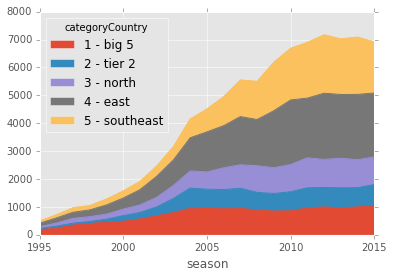

In [19]:
nonloans.merge(t,how='left',left_on='fromCountry',right_on='country',suffixes=('','Country'))[(nonloans.season>1994)&(nonloans['category']!='WTF')].groupby(['season','categoryCountry'])['id'].count().unstack().plot.area()

In [91]:
transfers[transfers.season>1994].groupby('season')[['duration','durationWithLoans']].mean() #.plot.line()

,duration,durationWithLoans
season,,
1995.0,753.199219,711.217668
1996.0,739.529543,692.462487
1997.0,716.974171,685.197794
1998.0,723.825450,683.028843
1999.0,696.709514,644.470947
2000.0,704.939108,651.704998
2001.0,726.451448,672.095318
2002.0,751.084050,690.670323
2003.0,744.191820,674.670266


In [94]:
503/366.

1.3743169398907105

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers_q.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')
leagueTables=pd.read_csv('../data/merged/leagueTables.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

leagueList = ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','BE1','MLS1','UKR1','GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','DK1','SE1','NO1','LI1','SC1','ISR1','PL1','UNG1','A1','C1','MAL1','KAS1','TS1','SLO1','SL1','FI1','LUX1','AZ1','IR1']

countryInfo=pd.read_excel('../data/reference/countries.xls').set_index('country')
countryInfo.marketTier=np.where(countryInfo.marketTier==4,3,countryInfo.marketTier)

top20clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:20].index
top50clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:50].index
top100clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:100].index

uefa=countryInfo[countryInfo.federation=='UEFA'].index
caf=countryInfo[countryInfo.federation=='CAF'].index
concacaf=countryInfo[countryInfo.federation=='CONCACAF'].index
concacaf_no_uscan=countryInfo[countryInfo.federation=='CONCACAF'].drop(['United States','Canada']).index
conmebol=countryInfo[countryInfo.federation=='CONMEBOL'].index
afc=countryInfo[countryInfo.federation=='AFC'].index
afc_no_anzac=countryInfo[countryInfo.federation=='AFC'].drop(['Australia','New Zealand']).index

country_coeff=pd.read_csv('../data/reference/country_coefficient2.csv').reset_index(drop=True).set_index('Country').rename(index={
        'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
        'Republic of Ireland': 'Ireland',
        'FYR Macedonia': 'Macedonia',
        'Faroe Islands':'Faroe Islands'
    })

natteam_coeff=pd.read_table('../data/reference/national_team_coefficient.csv').reset_index(drop=True).drop('Rank',axis=1)
natteam_coeff['Country']=natteam_coeff['Country'].str.strip()
natteam_coeff.Coefficient=natteam_coeff.Coefficient.apply(lambda s: int(s.replace(',','')))
natteam_coeff=natteam_coeff.rename(columns={'Coefficient':'National team coeff'}).set_index('Country')

club_coeff=pd.read_csv('../data/reference/club_coefficients.csv')[['rank','clubId','clubName','coeff12','coeff13','coeff14','coeff15','points']]

gdp=pd.read_table('../data/reference/country_gdp.csv').reset_index(drop=True).drop('2014 Rank',axis=1).rename(columns={'Country ':'Country'})
gdp.Country=gdp.Country.str.strip()
gdp=gdp.set_index('Country')
gdp.columns=['GDP '+c for c in gdp.columns.str.strip()]
for column in gdp.columns:
    gdp[column]=gdp[column].apply(lambda s: float(str(s).replace(',','')))
    
unemployed=pd.read_table('../data/reference/country_unemployment.csv').drop(['Date','Employment rate'],axis=1)
unemployed.columns=['Country','Unemployment']
unemployed['Country']=unemployed['Country'].str.split(' ').apply(lambda arr: ' '.join(arr[:len(arr)/2]))
unemployed=unemployed.set_index('Country').rename(index={'United Kingdom':'England'})

corruption=pd.read_table('../data/reference/country_corruption.csv').drop(['Rank'],axis=1)
corruption.Country=corruption.Country.str.strip()
corruption=corruption.set_index('Country')
corruption=corruption[corruption.columns[:1]].rename(columns={'2015 score':'Corruption'}).rename(index={'United Kingdom':'England'})

population=pd.read_table('../data/reference/country_population.csv').drop(['Rank'],axis=1)
population.columns=population.columns.str.strip()
population.Country=population.Country.str.split('[',expand=True)[0].str.strip()
population['Population']=population['Population'].apply(lambda s: float(str(s).replace(',','')))
population=population[['Country','Population','Growth %']].set_index('Country').rename(index={'United Kingdom':'England'})

barometer=pd.read_table('../data/reference/country_corruption_barometer.csv').reset_index(drop=True)
barometer.columns=['Corruption Rank','Country','Bribe %']
barometer.Country=barometer.Country.str.strip()
barometer=barometer.set_index('Country').rename(index={'United Kingdom':'England'})

countryInfo=natteam_coeff.join(country_coeff).join(gdp).join(unemployed).join(corruption).join(population).join(countryInfo).join(barometer)